In [34]:
# Data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sb


In [35]:
url = "/content/Airline_fare.csv"

In [36]:
df = pd.read_csv(url, index_col = "Unnamed: 0")

## Structure

In [37]:
print(df.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [38]:
print(df.shape)

(300153, 11)


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB
None


In [40]:
print(df.describe().round(2).T)

              count      mean       std      min      25%      50%       75%  \
duration   300153.0     12.22      7.19     0.83     6.83    11.25     16.17   
days_left  300153.0     26.00     13.56     1.00    15.00    26.00     38.00   
price      300153.0  20889.66  22697.77  1105.00  4783.00  7425.00  42521.00   

                 max  
duration       49.83  
days_left      49.00  
price      123071.00  


## Data Cleaning and Manipulation

In [41]:
print(f'The dataset contains {df.isnull().sum().sum()} null values.')

The dataset contains 0 null values.


In [42]:
print(f'The dataset contains {df.duplicated().sum()} duplicated values.')

The dataset contains 0 duplicated values.


## outliers

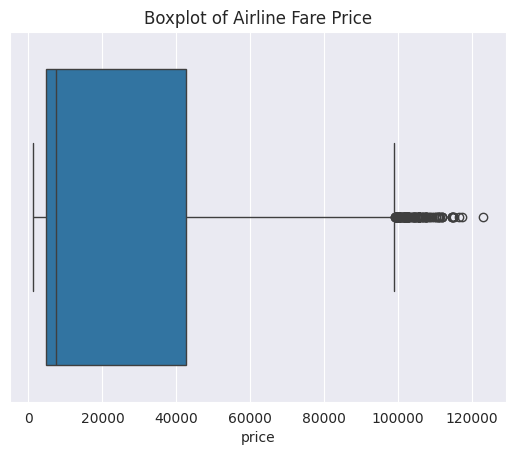

In [43]:
sb.set_style('darkgrid')
sb.boxplot(x='price',data = df)
plt.title('Boxplot of Airline Fare Price')
plt.show()

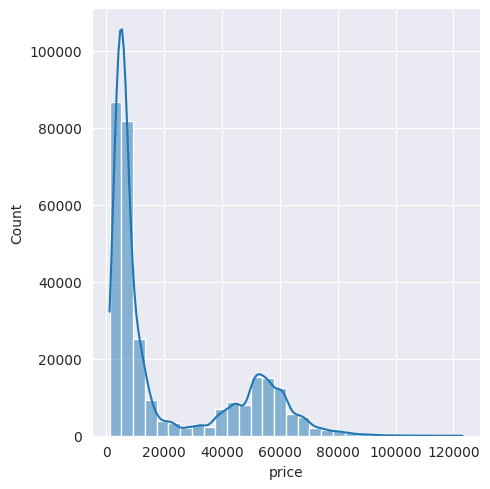

In [44]:
sb.displot(x = 'price', data = df,kind = 'hist',kde = True,bins =30)
plt.show()

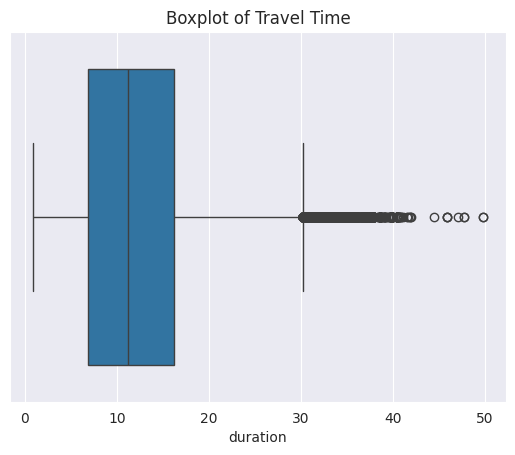

In [45]:
sb.boxplot(x='duration',data = df)
plt.title('Boxplot of Travel Time')
plt.show()

In [46]:
price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1

price_upper = price_Q3 + 1.5 * price_IQR
price_lower = price_Q1 - 1.5 * price_IQR

df_clean = df[(df['price'] > price_lower) & (df['price'] < price_upper)].copy()
df_clean.reset_index()
print(df_clean.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [47]:
print(df[df['price'] >= price_upper].sample(5))

        airline  flight source_city departure_time        stops  \
215859  Vistara  UK-809       Delhi        Evening  two_or_more   
291083  Vistara  UK-834     Chennai        Evening          one   
293474  Vistara  UK-836     Chennai        Morning          one   
287664  Vistara  UK-822     Chennai        Morning          one   
248968  Vistara  UK-814   Bangalore          Night          one   

         arrival_time destination_city     class  duration  days_left   price  
215859        Evening          Kolkata  Business     21.08          1  116562  
291083  Early_Morning           Mumbai  Business     14.75         13  106416  
293474          Night        Bangalore  Business      9.67          3  107597  
287664          Night            Delhi  Business     11.42          2  103683  
248968        Morning           Mumbai  Business     14.42          5   99680  


In [48]:
duration_Q1 = df_clean['duration'].quantile(0.25)
duration_Q3 = df_clean['duration'].quantile(0.75)
duration_IQR = duration_Q3 - duration_Q1

duration_upper = duration_Q3 + 1.5 * duration_IQR
duration_lower = duration_Q1 - 1.5 * duration_IQR

df_clean = df_clean[(df_clean['duration'] > duration_lower) & (df_clean['duration'] < duration_upper)].copy()
df_clean.reset_index()
print(df_clean.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


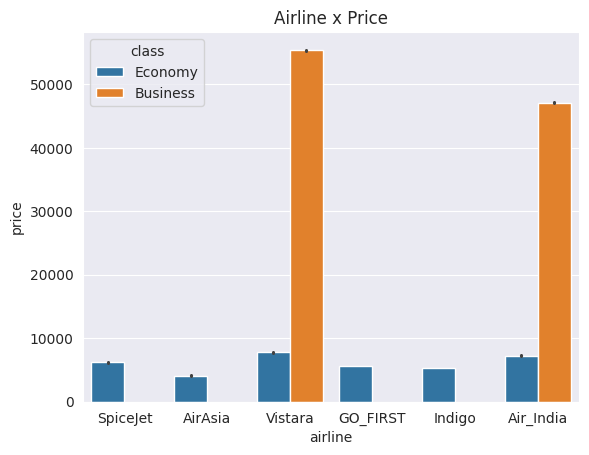

In [49]:
sb.set_style('darkgrid')
sb.barplot(df_clean, x = 'airline', y = 'price', hue = 'class')
plt.title('Airline x Price')
plt.show()

In [50]:
airline =df_clean.drop('flight',axis = 1)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(airline.drop('price',axis = 1), airline['price'],random_state = 1234, test_size = 0.3)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [54]:
Transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(sparse = False, drop='first'),['airline','source_city','departure_time','destination_city','arrival_time']),
        ('tnf2',OrdinalEncoder(categories=[['zero', 'one', 'two_or_more'],['Economy', 'Business']]),['stops','class']),
    ],remainder='passthrough'
)

In [55]:
Transformer.fit(X_train)

X_train = Transformer.transform(X_train)
X_test = Transformer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
print('No of independent freture are ',len(X_train[0]))

No of independent freture are  29


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
LR = LinearRegression()

In [59]:
LR.fit(X_train, y_train)

LinearRegression()

In [60]:
print("Coefficent are", LR.coef_, "\nIntercept is ", LR.intercept_)

Coefficent are [  294.07066512  2180.95922076  2485.46722381  2511.17331123
  4253.06893279  -137.97533448 -1504.05791838 -1672.37757537
  1429.65238679  -242.97691358   704.82491327   595.66719109
  1403.27725755   793.23570187   661.01375446  -282.76057668
 -1514.34929458 -1724.36742661  1316.89992128    46.69269733
  -828.00961771   890.20779351   945.43293583   339.28977581
  1102.12800132  5685.98627543 45100.24135786    81.69946077
  -127.08885192] 
Intercept is  883.4324784316486


In [64]:
from sklearn.metrics import r2_score ,mean_squared_error

In [62]:
y_test_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)

In [67]:
print('Test R2 Score', r2_score(y_test, y_test_pred))
print("MSE of test data",mean_squared_error(y_test, y_test_pred).round(2))
print('Train R2 Score', r2_score(y_train, y_train_pred))
print("MSE of train data",mean_squared_error(y_train, y_train_pred).round(2))

Test R2 Score 0.9112296368477337
MSE of test data 45537496.84
Train R2 Score 0.9110894860902594
MSE of train data 45741650.98
